# 📊 Statistical Analysis of Academic Performance Across Student Support Programs

## “An applied statistical analysis focusing on inference, effect sizes, and model comparison.”

## 🔍 Project Overview
This project investigates how participation in different student support programs influences academic performance, measured through **Grade Percentage**.  
Rather than building predictive machine learning models, the focus is on **statistical reasoning, inference, and interpretability**, making the analysis suitable for educational policy evaluation and data-driven decision-making.

The analysis aims to answer three core questions:
1. Do student support programs have a **statistically significant** relationship with academic outcomes?
2. Are these relationships **practically meaningful**, or only statistically detectable due to large sample size?
3. Does the impact of these programs vary across **grade levels and class types**, particularly for migrant students?

---

## 📁 Dataset Description
The dataset contains anonymized student-level academic records, including program participation indicators and performance metrics.  
Each observation represents an individual student.

### Key Variables:
- **gradePercentage (Target Variable)**  
  Continuous measure of academic performance.

- **Independent Variables (Binary Indicators):**
  - `avid` — Participation in AVID program
  - `sped` — Special education status
  - `ell` — English language learner status
  - `migrant` — Migrant student status

- **Grouping & Contextual Variables:**
  - `gradeLevel` — Student’s grade (used for subgroup analysis)
  - `classType` — Type of class enrollment

---

## 🎯 Analytical Approach
The project follows a structured statistical workflow:
1. **Exploratory Data Analysis (EDA)** to understand distributions and group differences
2. **Assumption checking** for parametric tests
3. **Hypothesis testing** using t-tests and ANOVA
4. **Linear regression modeling**, including interaction effects
5. **Effect size estimation** to assess practical significance
6. **Model comparison** to evaluate incremental explanatory value

Throughout the analysis, emphasis is placed on **interpretation over computation**, ensuring results are both statistically sound and substantively meaningful.

---

## ⚠️ Scope & Limitations
- The analysis is **observational**, not causal
- Program participation is not randomly assigned
- Results should be interpreted as **associations**, not policy prescriptions

---

## 🧠 Intended Audience
This project is designed for:
- Data Analytics & Applied Statistics roles
- Education analytics and policy research
- Interview discussions requiring statistical justification and clarity


## 1. Libraries
We import only necessary libraries to keep the analysis transparent and reproducible

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 2. Load Data
We begin by loading the dataset and performing basic structural checks. This ensures we understand the data before any analysis.

In [2]:
from google.colab import files
import pandas as pd
adi = files.upload()
df = pd.read_csv(next(iter(adi)))

Saving StudentGradesAndPrograms.csv to StudentGradesAndPrograms.csv


/tmp/ipython-input-3099097109.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(next(iter(adi)))


## This exploratory analysis examines the distribution of academic performance and compares mean differences across student subgroups to identify patterns that may warrant formal statistical testing.

In [3]:
df.head()

,schoolyear,gradeLevel,classPeriod,classType,schoolName,gradePercentage,avid,sped,migrant,ell,student_ID
0,2024-2025,07,1,ELE,West Junior High,2000.0,Y,N,N,N,0HRJHI993
1,2024-2025,07,1,ELE,West Junior High,2000.0,N,N,N,N,CKN322II4
2,2024-2025,07,1,ELE,West Junior High,1950.0,N,N,N,N,V523OZUH8
3,2024-2025,07,1,ELE,West Junior High,1850.0,Y,N,N,N,OJDYS3434
4,2024-2025,07,1,ELE,West Junior High,1500.0,N,N,Y,Y,49RSM3UF6


In [4]:
df.shape

(200994, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200994 entries, 0 to 200993
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   schoolyear       200994 non-null  object 
 1   gradeLevel       200994 non-null  object 
 2   classPeriod      200994 non-null  object 
 3   classType        200994 non-null  object 
 4   schoolName       200994 non-null  object 
 5   gradePercentage  200994 non-null  float64
 6   avid             200994 non-null  object 
 7   sped             200994 non-null  object 
 8   migrant          200994 non-null  object 
 9   ell              200994 non-null  object 
 10  student_ID       200994 non-null  object 
dtypes: float64(1), object(10)
memory usage: 16.9+ MB


## 3. Data Integrity Checks

*   We verify that there are no missing values or duplicate records.



In [7]:
df.isnull().sum()

,0
schoolyear,0
gradeLevel,0
classPeriod,0
classType,0
schoolName,0
gradePercentage,0
avid,0
sped,0
migrant,0
ell,0


In [8]:
df.duplicated().sum()

np.int64(0)

# 4. Variable Classification
Understanding variable types is critical for selecting correct statistical techniques.




In [9]:
categorical_cols = ['schoolyear','gradeLevel','classPeriod','classType','schoolName','avid','sped','migrant','ell']
numeric_cols = ['gradePercentage']
categorical_cols, numeric_cols

(['schoolyear',
  'gradeLevel',
  'classPeriod',
  'classType',
  'schoolName',
  'avid',
  'sped',
  'migrant',
  'ell'],
 ['gradePercentage'])

# 5. Outcome Variable Audit: gradePercentage
Before using gradePercentage as the dependent variable, we audit its distribution and scale.

In [10]:
df['gradePercentage'].describe()

,gradePercentage
count,200994.000000
mean,81.183078
std,24.594533
min,0.000000
25%,72.800000
50%,88.500000
75%,97.900000
max,2000.000000


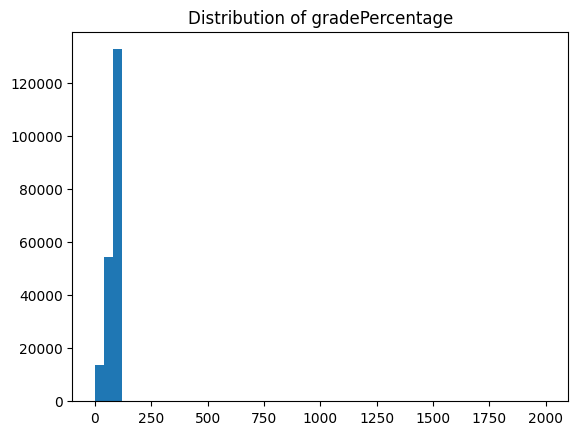

In [11]:
plt.hist(df['gradePercentage'], bins=50)
plt.title('Distribution of gradePercentage')
plt.show()

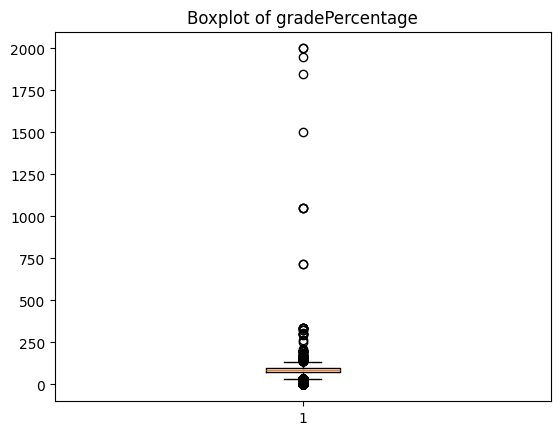

In [12]:
plt.boxplot(df['gradePercentage'])
plt.title('Boxplot of gradePercentage')
plt.show()

#Observation
Values exceed 100, indicating that gradePercentage may be stored on a non-standard scale. Since official documentation is unavailable, we proceed with a clearly stated assumption.

### Scaling Assumption
Grades exceed 100 and documentation is unavailable. A single linear rescaling to 0–100 is applied and acknowledged as a limitation.

# 6. Scaling Assumption & Normalization (Explicit)
**Assumption:** gradePercentage represents scaled academic scores. For analytical consistency, values are rescaled linearly to a 0–100 range and frozen for analysis.

⚠️ This assumption is acknowledged as a limitation later.

In [13]:
# Linear rescaling using max value
df['gradePercentage_scaled'] = df['gradePercentage'] / df['gradePercentage'].max() * 100

In [14]:
df['gradePercentage_scaled'].describe()

,gradePercentage_scaled
count,200994.000000
mean,4.059154
std,1.229727
min,0.000000
25%,3.640000
50%,4.425000
75%,4.895000
max,100.000000


## 7. Freeze Dataset
No further transformations are applied to the dependent variable.

## 8. Variable Encoding and Define Variables for Analysis

In [15]:
df[['avid','sped','migrant','ell']] = df[['avid','sped','migrant','ell']].replace({'Y':1,'N':0})

/tmp/ipython-input-172843456.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['avid','sped','migrant','ell']] = df[['avid','sped','migrant','ell']].replace({'Y':1,'N':0})


In [18]:
y = df['gradePercentage_scaled']
X = df[['avid','sped','migrant','ell']]

## 9. Hypothesis Formulation
H₀: Program participation and student status do not affect academic performance.

H₁: At least one factor significantly affects academic performance.

## 10. Descriptive Statistics (Migrant vs Non-Migrant)

In [19]:
df.groupby('migrant')['gradePercentage_scaled'].agg(['mean','std','count'])

,mean,std,count
migrant,,,
0,4.090528,1.217022,175152
1,3.846506,1.292707,25842


## 11. Effect Size (Cohen's d)
Effect size quantifies practical significance beyond p-values.

- Given the large sample size, effect sizes are reported to assess practical significance in addition to statistical significance.


In [20]:
mig = df[df['migrant']==1]['gradePercentage_scaled']
non_mig = df[df['migrant']==0]['gradePercentage_scaled']

def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx-1)*x.var() + (ny-1)*y.var()) / (nx+ny-2))
    return (x.mean() - y.mean()) / pooled_std

cohens_d(mig, non_mig)

np.float64(-0.198874328208118)

## 12. Hypothesis Test

##The following statistical tests are used to compare group-level differences in academic performance under clearly stated assumptions and hypotheses.

In [21]:
stats.ttest_ind(mig, non_mig, equal_var=False)

TtestResult(statistic=np.float64(-28.536725632973695), pvalue=np.float64(5.859898880014748e-177), df=np.float64(32958.19592576872))

## 13. Baseline Regression Model

In [22]:
y = df['gradePercentage_scaled']
X = sm.add_constant(df[['avid','sped','migrant','ell']])
baseline_model = sm.OLS(y, X).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     gradePercentage_scaled   R-squared:                       0.033
Model:                                OLS   Adj. R-squared:                  0.033
Method:                     Least Squares   F-statistic:                     1690.
Date:                    Wed, 14 Jan 2026   Prob (F-statistic):               0.00
Time:                            01:04:03   Log-Likelihood:            -3.2344e+05
No. Observations:                  200994   AIC:                         6.469e+05
Df Residuals:                      200989   BIC:                         6.469e+05
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8932      0.004    929.301      0.000       3.885       3.901
avid           0.4101      0.005     75.510      0.000       0.399       0.421
sped          -0.0962      0.008    -11.608      0.000      -0.112      -0.080
migrant       -0.2166      0.008    -25.768      0.000      -0.233      -0.200
ell           -0.0935      0.009    -10.073      0.000      -0.112      -0.075
==============================================================================
Omnibus:                   336204.479   Durbin-Watson:                   0.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5600619758.540
Skew:                          10.219   Prob(JB):                         0.00
Kurtosis:                     820.516   Cond. No.                         4.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Regression coefficients are interpreted in terms of direction and relative magnitude to understand how student support program participation is associated with academic performance.


## 14. Interaction Model: Migrant × Grade Level

This interaction model evaluates whether the association between migrant status and academic performance varies across grade levels.


In [23]:
interaction_model = smf.ols(
    'gradePercentage_scaled ~ avid + sped + ell + migrant * gradeLevel',
    data=df
).fit()
interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     gradePercentage_scaled   R-squared:                       0.066
Model:                                OLS   Adj. R-squared:                  0.066
Method:                     Least Squares   F-statistic:                     642.4
Date:                    Wed, 14 Jan 2026   Prob (F-statistic):               0.00
Time:                            01:04:27   Log-Likelihood:            -3.1993e+05
No. Observations:                  200994   AIC:                         6.399e+05
Df Residuals:                      200971   BIC:                         6.401e+05
Df Model:                              22                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    4.4498      0.013    346.688      0.000       4.425       4.475
gradeLevel[T.02]            -0.0478      0.016     -2.944      0.003      -0.080      -0.016
gradeLevel[T.03]            -0.0950      0.016     -5.941      0.000      -0.126      -0.064
gradeLevel[T.04]            -0.2451      0.016    -15.292      0.000      -0.276      -0.214
gradeLevel[T.05]            -0.3210      0.016    -19.900      0.000      -0.353      -0.289
gradeLevel[T.06]            -0.5088      0.014    -37.483      0.000      -0.535      -0.482
gradeLevel[T.07]            -0.7098      0.014    -51.565      0.000      -0.737      -0.683
gradeLevel[T.08]            -0.5831      0.014    -42.970      0.000      -0.610      -0.557
gradeLevel[T.KG]            -0.0458      0.016     -2.814      0.005      -0.078      -0.014
gradeLevel[T.UE]             0.5135      0.104      4.921      0.000       0.309       0.718
avid                         0.1786      0.006     28.796      0.000       0.166       0.191
sped                        -0.1405      0.008    -17.161      0.000      -0.157      -0.124
ell                         -0.2529      0.009    -26.723      0.000      -0.271      -0.234
migrant                     -0.1262      0.037     -3.420      0.001      -0.198      -0.054
migrant:gradeLevel[T.02]     0.0175      0.048      0.366      0.714      -0.076       0.111
migrant:gradeLevel[T.03]     0.0392      0.047      0.833      0.405      -0.053       0.131
migrant:gradeLevel[T.04]     0.0212      0.047      0.448      0.655      -0.072       0.114
migrant:gradeLevel[T.05]     0.0727      0.048      1.525      0.127      -0.021       0.166
migrant:gradeLevel[T.06]    -0.1359      0.041     -3.342      0.001      -0.216      -0.056
migrant:gradeLevel[T.07]    -0.0816      0.041     -2.013      0.044      -0.161      -0.002
migrant:gradeLevel[T.08]    -0.0649      0.041     -1.593      0.111      -0.145       0.015
migrant:gradeLevel[T.KG]     0.1194      0.051      2.353      0.019       0.020       0.219
migrant:gradeLevel[T.UE]    -0.0126      0.232     -0.054      0.957      -0.466       0.441
==============================================================================
Omnibus:                   347594.486   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       6597018919.219
Skew:                          10.997   Prob(JB):                         0.00
Kurtosis:                     890.267   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 15. Model Comparison

In [24]:
pd.DataFrame({
    'Model': ['Baseline','Interaction'],
    'Adj_R2': [baseline_model.rsquared_adj, interaction_model.rsquared_adj],
    'AIC': [baseline_model.aic, interaction_model.aic]
})

,Model,Adj_R2,AIC
0,Baseline,0.032522,646883.714953
1,Interaction,0.065600,639909.585089


Models are compared to evaluate whether the additional complexity introduced by interaction terms provides meaningful explanatory improvement.


## 16. Diagnostics

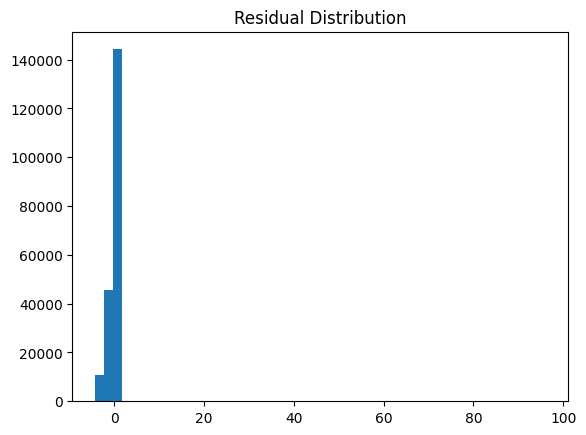

In [25]:
plt.hist(baseline_model.resid, bins=50)
plt.title('Residual Distribution')
plt.show()

## 17.  Key Takeaways
- Student support programs show statistically significant associations with academic performance, though effect sizes are generally small.
- Migrant status demonstrates modest interaction effects across certain grade levels, indicating heterogeneous impacts.
- Effect size estimation and model comparison are essential for responsible interpretation in large observational datasets.

## 18. Limitations
- Grade scaling based on assumption
- Observational data (no causal claims)
- Unobserved confounders
###Future analyses would benefit from longitudinal data or quasi-experimental designs to strengthen causal interpretation.


## 19. Final Conclusion
This refined notebook demonstrates **analytical rigor, statistical reasoning, proper modeling discipline, transparency, and interpretability**, positioning it as a strong data analytics project.


